## Predicting `Heart Disease` using Machine `Supervised` Learning 

using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

**Looking at the following main topics;**
1. **`Problem definition`**
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?
2. **`Data`**
> We use the independent variables to predict our dependent variable.

    * orginally data is come from https://archive.ics.uci.edu/ml/datasets/heart+Disease
    * used kaggle version is come from https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset


3. **`Evaluation`**
> If we can reach 90% accuracy at predicting whether or not a patient has heart disease during the proof of concept.
4. **`Features`**
> create a data dictionary
    
    ***description of heart disease columns***
    1. **`age`** - age in years
    2. **`sex`** - (1 = male; 0 = female)
    3. **`cp`** - chest pain type
        * 0: Typical angina: chest pain related decrease blood supply to the heart
        * 1: Atypical angina: chest pain not related to heart
        * 2: Non-anginal pain: typically esophageal spasms (non heart related)
        * 3: Asymptomatic: chest pain not showing signs of disease
    4. **`trestbps`** - resting blood pressure (in mm Hg on admission to the hospital)
        * anything above 130-140 is typically cause for concern
    5. **`chol`** - serum cholestoral in mg/dl
        * serum = LDL + HDL + .2 * triglycerides
        * above 200 is cause for concern
    6. **`fbs`** - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
        * '>126' mg/dL signals diabetes
    7. **`restecg`** - resting electrocardiographic results
        * 0: Nothing to note
        * 1: ST-T Wave abnormality
            * can range from mild symptoms to severe problems
            * signals non-normal heart beat
        * 2: Possible or definite left ventricular hypertrophy
            * Enlarged heart's main pumping chamber
    8. **`thalach`** - maximum heart rate achieved
    9. **`exang`** - exercise induced angina (1 = yes; 0 = no)
    10. **`oldpeak`** - ST depression induced by exercise relative to rest
        * looks at stress of heart during excercise
        * unhealthy heart will stress more
    11. **`slope`** - the slope of the peak exercise ST segment
        * 0: Upsloping: better heart rate with excercise (uncommon)
        * 1: Flatsloping: minimal change (typical healthy heart)
        * 2: Downslopins: signs of unhealthy heart
    12. **`ca`** - number of major vessels (0-3) colored by flourosopy
        * colored vessel means the doctor can see the blood passing through
        * the more blood movement the better (no clots)
    13. **`thal`** - thalium stress result
        * 1,3: normal
        * 6: fixed defect: used to be defect but ok now
        * 7: reversable defect: no proper blood movement when excercising
    14. **`target`** - have disease or not (1=yes, 0=no) (= the predicted attribute)


5. **`Modelling`**
> use machine learning to predict our target variable based on the 13 independent variables as per above problems
6. **`Experimentation`**
> we already doing it as per step 1 and step 3, the question is did you reach step 3 mentioned accuracy?

***Subtopics***
* **`Exploratory data analysis (EDA)`**: the process of going through a dataset and finding out more about it.
* **`Model training`**: create model(s) to learn to predict a target variable based on other variables.
* **`Model evaluation`**: evaluating a models predictions using problem-specific evaluation metrics.
* **`Model comparison`**: comparing several different models to find the best one.
* **`Model fine-tuning`**: once we've found a good model, how can we improve it?
* **`Feature importance`**: since we're predicting the presence of heart disease, are there some things which are more important for prediction?
* **`Cross-validation`**: if we do build a good model, can we be sure it will work on unseen data?
* **`Reporting what we've found`**: if we had to present our work, what would we show someone?

### Preparing the tools

using `pandas`, `Matplotlib` and `NumPy` for **data analysis** and **manipulation**

In [1]:
# import all the tools

# regular EDA "exploratory data analysis and plotting libraries"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plots inside notebook
%matplotlib inline

# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

# model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### Load Data

In [2]:
df = pd.read_csv("data/heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Data Exploration (`exploratory data analysis` or `EDA`)

**EDA Methodolgy**

* What question(s) are you trying to solve (or prove wrong)?
* What kind of data do you have and how do you treat different types?
* What’s missing from the data and how do you deal with it?
* Where are the outliers and why should you care about them?
* How can you add, change or remove features to get more out of your data?

In [3]:
# first 5 rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# last 5 rows
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# how many of each class
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

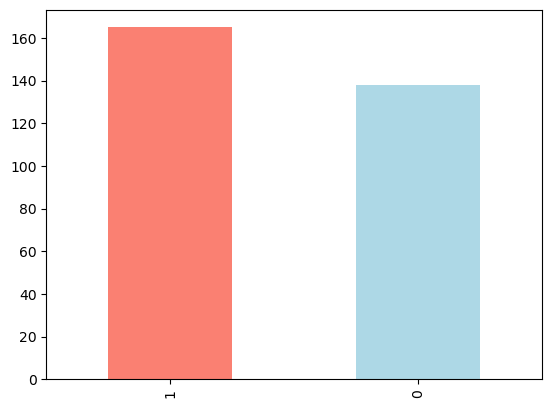

In [6]:
# visually show balance in target
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# check missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Gender (SEX)

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


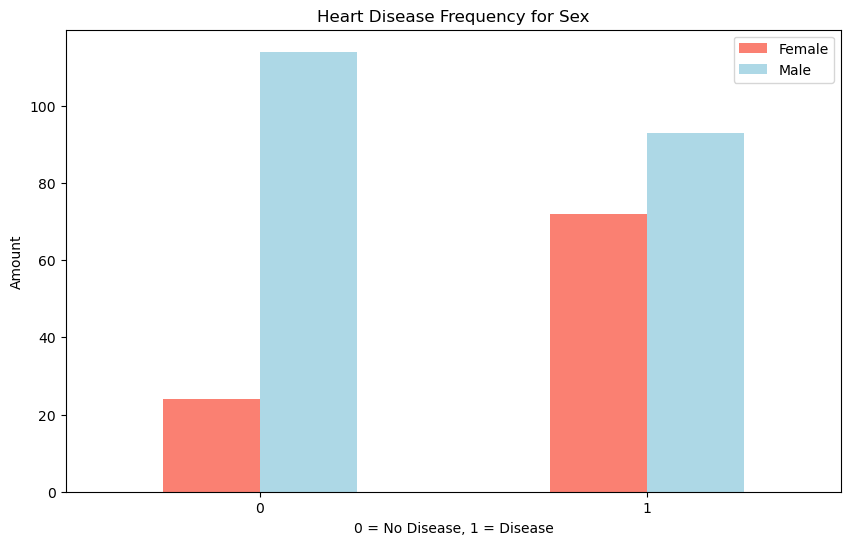

In [12]:
# create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"])

# add some attributes
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
# keep labels on the x-axis vertical
plt.xticks(rotation=0);

### Age vs Max Heart Rate for Heart Disease

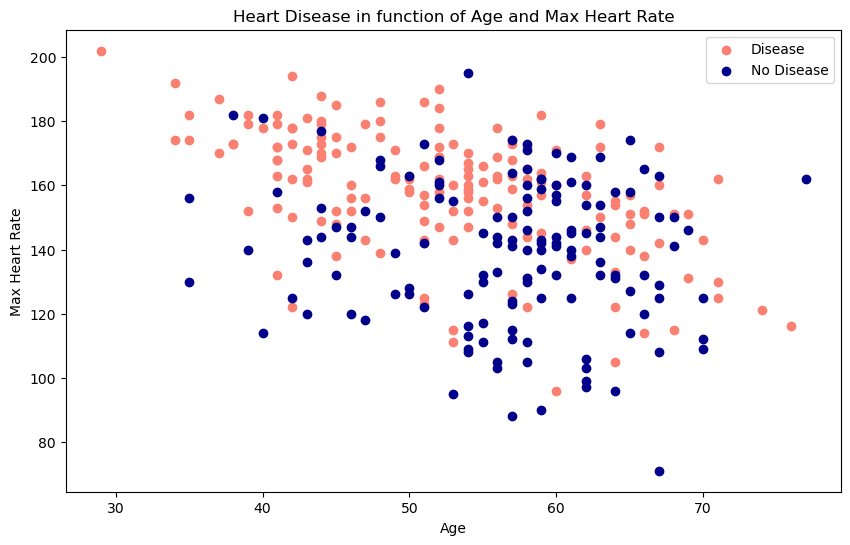

In [13]:
# create figure
plt.figure(figsize=(10, 6))

# scatter with filter data with target positive - heart disease
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c="salmon")

# scatter with target zero - no heart disease
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c="darkblue")

# add some description
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

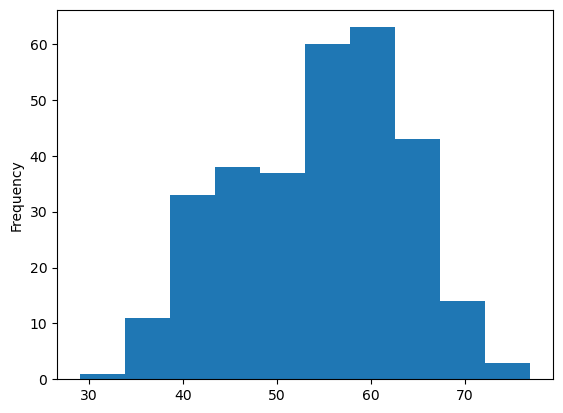

In [14]:
# distribution of the age column using histogram
df.age.plot.hist();

### Heart Disease Frequency as per Chest Pain Type

* **`cp`** - chest pain type
  * 0: Typical angina: chest pain related decrease blood supply to the heart
  * 1: Atypical angina: chest pain not related to heart
  * 2: Non-anginal pain: typically esophageal spasms (non heart related)
  * 3: Asymptomatic: chest pain not showing signs of disease

In [15]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


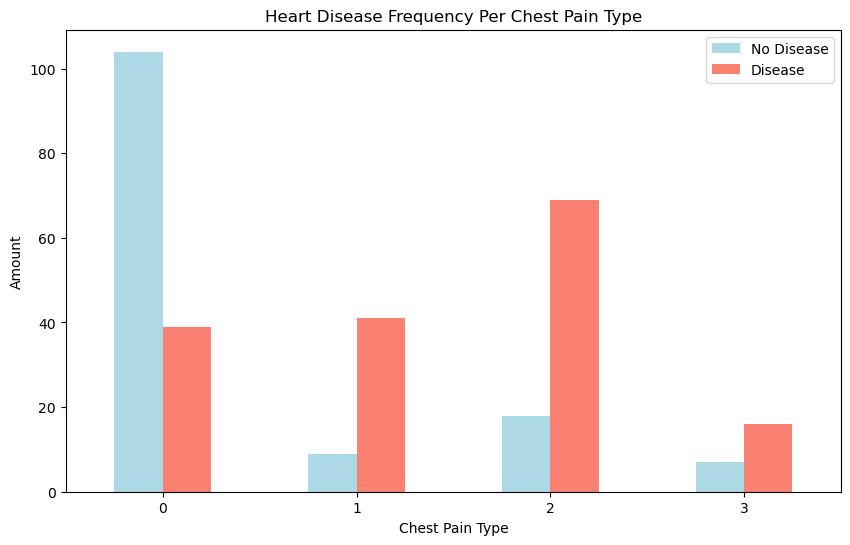

In [16]:
# crosstab and base plot
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["lightblue", "salmon"])

# add attributes to the plot
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Correlation between independent variables

***a big table of numbers telling us how related each variable is the other***

In [18]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


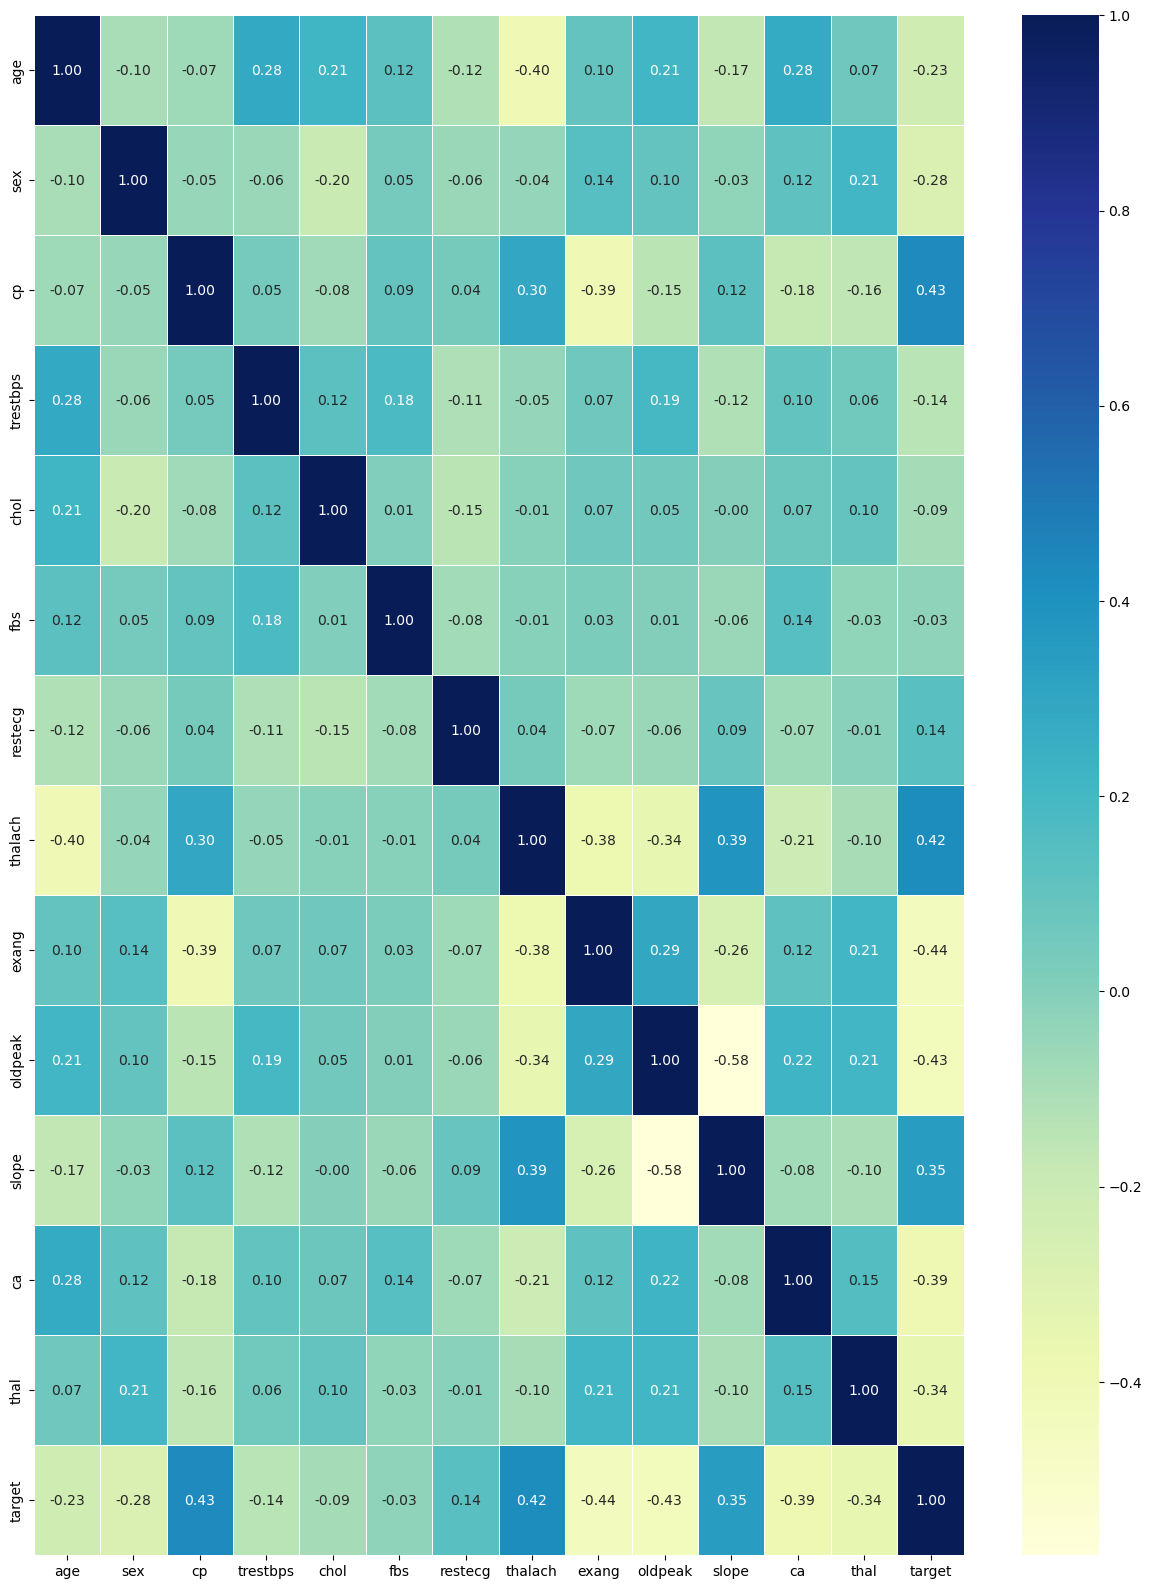

In [19]:
# correlation matrix with Heat Map
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 20))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

**`Correlation`:**
  * `Negative correlation`: is when two variables move opposite one another so that when one variable rises, the other falls.
  * `Positive correlation`: exists when two variables operate in unison so that when one variable rises or falls, the other does the same.
  
* ***`Investigation of column exang`***: It is negative correlation so, if someone gets chest pain during exercise `exang=1`, their chance of having heart disease `target=0` goes down.

### Modeling

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Prepare data for applying Machine Learning algorithm

In [21]:
# split data into X and y
X = df.drop("target", axis=1)
y = df["target"]

In [22]:
# Random seed for reproducibility
np.random.seed(42)

# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

**`Notes`**: 
* Data splitted as training and test to build machine learning model.
* Find pattern `train data`.
* Use pattern `test data`.

#### Model choices

1. Logistic Regression - `Logistic Regression()`

> Logistic regression, despite its name, is a linear model for classification rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.

2. K-Nearest Neighbors - `KNeighboursClassifier()`
3. RandomForest - `RandomForestClassifier()`
4. CatBoost - `CatBoostClassifier()`
5. XgBoost - `XGBClassifier()`
6. Naive Bayes - `GaussianNB()`
7. Support Vector Machines - `SVC()`
8. Stochastic Gradient Descent - `SGDClassifier()`

In [23]:
# models in a dictionary
models = {"Logistic Regression        ": LogisticRegression(max_iter=1000),
          "KNN                        ": KNeighborsClassifier(),
          "Random Forest              ": RandomForestClassifier(),
          "CatBoost                   ": CatBoostClassifier(),
          "XgBoost                    ": XGBClassifier(),
          "Naive Bayes                ": GaussianNB(),
          "Support Vector Machines    ": SVC(),
          "Stochastic Gradient Descent": SGDClassifier()}

# function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: dictionary of different Scikit-Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: labels assosciated with training data
    y_test: labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # make a list to keep model scores
    model_scores = {}
    # loop through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, y_train)
        # evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [24]:
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
model_scores

Learning rate set to 0.00547
0:	learn: 0.6882407	total: 133ms	remaining: 2m 12s
1:	learn: 0.6840606	total: 134ms	remaining: 1m 7s
2:	learn: 0.6801035	total: 136ms	remaining: 45s
3:	learn: 0.6758062	total: 137ms	remaining: 34s
4:	learn: 0.6717442	total: 138ms	remaining: 27.4s
5:	learn: 0.6671794	total: 139ms	remaining: 23s
6:	learn: 0.6641249	total: 140ms	remaining: 19.9s
7:	learn: 0.6603131	total: 141ms	remaining: 17.5s
8:	learn: 0.6561870	total: 142ms	remaining: 15.6s
9:	learn: 0.6524910	total: 143ms	remaining: 14.2s
10:	learn: 0.6480964	total: 144ms	remaining: 12.9s
11:	learn: 0.6445001	total: 145ms	remaining: 11.9s
12:	learn: 0.6405990	total: 146ms	remaining: 11.1s
13:	learn: 0.6369423	total: 147ms	remaining: 10.4s
14:	learn: 0.6328240	total: 148ms	remaining: 9.72s
15:	learn: 0.6285960	total: 149ms	remaining: 9.17s
16:	learn: 0.6241533	total: 150ms	remaining: 8.68s
17:	learn: 0.6199704	total: 151ms	remaining: 8.25s
18:	learn: 0.6160648	total: 152ms	remaining: 7.86s
19:	learn: 0.6119

273:	learn: 0.2672491	total: 400ms	remaining: 1.06s
274:	learn: 0.2665492	total: 401ms	remaining: 1.06s
275:	learn: 0.2660805	total: 402ms	remaining: 1.05s
276:	learn: 0.2654433	total: 403ms	remaining: 1.05s
277:	learn: 0.2648171	total: 404ms	remaining: 1.05s
278:	learn: 0.2643356	total: 405ms	remaining: 1.05s
279:	learn: 0.2636644	total: 406ms	remaining: 1.04s
280:	learn: 0.2631912	total: 407ms	remaining: 1.04s
281:	learn: 0.2630341	total: 408ms	remaining: 1.04s
282:	learn: 0.2623066	total: 409ms	remaining: 1.04s
283:	learn: 0.2618107	total: 410ms	remaining: 1.03s
284:	learn: 0.2611137	total: 411ms	remaining: 1.03s
285:	learn: 0.2604239	total: 412ms	remaining: 1.03s
286:	learn: 0.2596353	total: 413ms	remaining: 1.03s
287:	learn: 0.2591192	total: 414ms	remaining: 1.02s
288:	learn: 0.2585837	total: 415ms	remaining: 1.02s
289:	learn: 0.2579952	total: 416ms	remaining: 1.02s
290:	learn: 0.2576313	total: 418ms	remaining: 1.02s
291:	learn: 0.2573470	total: 419ms	remaining: 1.01s
292:	learn: 

481:	learn: 0.1890422	total: 600ms	remaining: 645ms
482:	learn: 0.1886994	total: 601ms	remaining: 643ms
483:	learn: 0.1884688	total: 602ms	remaining: 642ms
484:	learn: 0.1880465	total: 603ms	remaining: 641ms
485:	learn: 0.1876906	total: 604ms	remaining: 639ms
486:	learn: 0.1873281	total: 605ms	remaining: 638ms
487:	learn: 0.1870863	total: 606ms	remaining: 636ms
488:	learn: 0.1866848	total: 607ms	remaining: 635ms
489:	learn: 0.1863340	total: 609ms	remaining: 633ms
490:	learn: 0.1860603	total: 610ms	remaining: 632ms
491:	learn: 0.1858443	total: 615ms	remaining: 635ms
492:	learn: 0.1856229	total: 617ms	remaining: 634ms
493:	learn: 0.1853787	total: 618ms	remaining: 633ms
494:	learn: 0.1850644	total: 619ms	remaining: 632ms
495:	learn: 0.1846702	total: 620ms	remaining: 630ms
496:	learn: 0.1843999	total: 622ms	remaining: 629ms
497:	learn: 0.1842545	total: 623ms	remaining: 628ms
498:	learn: 0.1840721	total: 624ms	remaining: 626ms
499:	learn: 0.1837988	total: 625ms	remaining: 625ms
500:	learn: 

666:	learn: 0.1479768	total: 797ms	remaining: 398ms
667:	learn: 0.1476490	total: 798ms	remaining: 396ms
668:	learn: 0.1474957	total: 799ms	remaining: 395ms
669:	learn: 0.1473865	total: 800ms	remaining: 394ms
670:	learn: 0.1472305	total: 801ms	remaining: 393ms
671:	learn: 0.1470435	total: 802ms	remaining: 391ms
672:	learn: 0.1468717	total: 803ms	remaining: 390ms
673:	learn: 0.1466501	total: 804ms	remaining: 389ms
674:	learn: 0.1464365	total: 806ms	remaining: 388ms
675:	learn: 0.1462251	total: 807ms	remaining: 387ms
676:	learn: 0.1459786	total: 808ms	remaining: 386ms
677:	learn: 0.1458112	total: 809ms	remaining: 384ms
678:	learn: 0.1456363	total: 811ms	remaining: 383ms
679:	learn: 0.1455805	total: 812ms	remaining: 382ms
680:	learn: 0.1454123	total: 813ms	remaining: 381ms
681:	learn: 0.1451609	total: 814ms	remaining: 380ms
682:	learn: 0.1449433	total: 815ms	remaining: 378ms
683:	learn: 0.1449094	total: 816ms	remaining: 377ms
684:	learn: 0.1447704	total: 817ms	remaining: 376ms
685:	learn: 

851:	learn: 0.1173123	total: 993ms	remaining: 172ms
852:	learn: 0.1172148	total: 994ms	remaining: 171ms
853:	learn: 0.1170649	total: 995ms	remaining: 170ms
854:	learn: 0.1169403	total: 996ms	remaining: 169ms
855:	learn: 0.1167605	total: 997ms	remaining: 168ms
856:	learn: 0.1166982	total: 998ms	remaining: 167ms
857:	learn: 0.1164921	total: 999ms	remaining: 165ms
858:	learn: 0.1163821	total: 1000ms	remaining: 164ms
859:	learn: 0.1162876	total: 1s	remaining: 163ms
860:	learn: 0.1160566	total: 1s	remaining: 162ms
861:	learn: 0.1158656	total: 1s	remaining: 161ms
862:	learn: 0.1157786	total: 1s	remaining: 159ms
863:	learn: 0.1155482	total: 1s	remaining: 158ms
864:	learn: 0.1154190	total: 1.01s	remaining: 157ms
865:	learn: 0.1152755	total: 1.01s	remaining: 156ms
866:	learn: 0.1150477	total: 1.01s	remaining: 155ms
867:	learn: 0.1149482	total: 1.01s	remaining: 154ms
868:	learn: 0.1147310	total: 1.01s	remaining: 152ms
869:	learn: 0.1146468	total: 1.01s	remaining: 151ms
870:	learn: 0.1144939	tota

{'Logistic Regression        ': 0.8947368421052632,
 'KNN                        ': 0.6973684210526315,
 'Random Forest              ': 0.8157894736842105,
 'CatBoost                   ': 0.8157894736842105,
 'XgBoost                    ': 0.8157894736842105,
 'Naive Bayes                ': 0.881578947368421,
 'Support Vector Machines    ': 0.6973684210526315,
 'Stochastic Gradient Descent': 0.5526315789473685}

#### Model Comparison

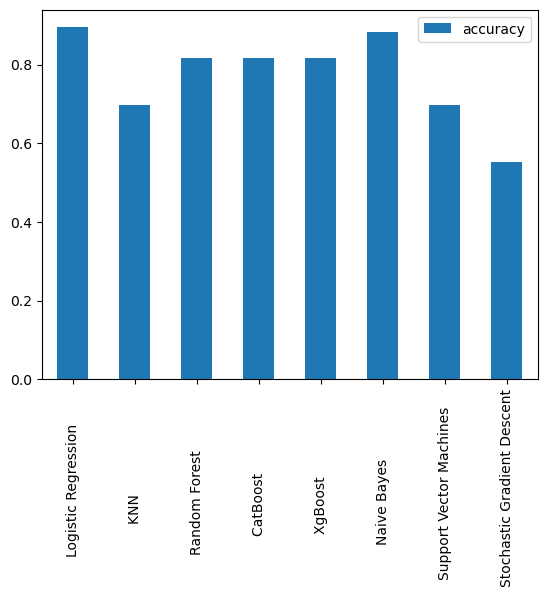

In [25]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

figure out ***`classification` report, `confusion matrix`, `cross-validated precision`, `recall`, `F1 scores` and `ROC curve`***

**Important sections with descriptions**

* `Hyperparameter tuning`: Each model you use has a series of dials you can turn to dictate how they perform. Changing these values may increase or decrease model performance.
* `Feature importance`: If there are a large amount of features we're using to make predictions, do some have more importance than others? For example, for predicting heart disease, which is more important, sex or age?
* `Confusion matrix`: Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).
* `Cross-validation`: Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an average.
* `Precision`: Proportion of true positives over total number of samples. Higher precision leads to less false positives.
* `Recall`: Proportion of true positives over total number of true positives and false negatives. Higher recall leads to less false negatives.
* `F1 score`: Combines precision and recall into one metric. 1 is best, 0 is worst.
* `Classification report`: Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.
* `ROC Curve`: Receiver Operating Characterisitc is a plot of true positive rate versus false positive rate.
* `Area Under Curve (AUC)`: The area underneath the ROC curve. A perfect model achieves a score of 1.0.

#### Hyperparameter tuning

In [26]:
# tune KNN
train_score = []
test_score = []

# list of different values for n_neighbors
neighbors = range(1, 21)

# KNN instance
knn = KNeighborsClassifier()

# loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # fit the algorithm
    knn.fit(X_train, y_train)

    # update the training score list
    train_score.append(knn.score(X_train, y_train))

    # update the test score list
    test_score.append(knn.score(X_test, y_test))

In [27]:
train_score

[1.0,
 0.7929515418502202,
 0.7709251101321586,
 0.7444933920704846,
 0.7577092511013216,
 0.73568281938326,
 0.7268722466960352,
 0.7136563876651982,
 0.7224669603524229,
 0.7136563876651982,
 0.7312775330396476,
 0.7136563876651982,
 0.7092511013215859,
 0.6960352422907489,
 0.6960352422907489,
 0.6784140969162996,
 0.6960352422907489,
 0.6607929515418502,
 0.6916299559471366,
 0.6784140969162996]

In [28]:
test_score

[0.6052631578947368,
 0.6052631578947368,
 0.6710526315789473,
 0.6973684210526315,
 0.6973684210526315,
 0.7105263157894737,
 0.7236842105263158,
 0.7236842105263158,
 0.7105263157894737,
 0.7368421052631579,
 0.75,
 0.7105263157894737,
 0.7105263157894737,
 0.6973684210526315,
 0.6842105263157895,
 0.7236842105263158,
 0.7236842105263158,
 0.7236842105263158,
 0.7368421052631579,
 0.7236842105263158]

Maximum KNN score on the test data: 75.00%


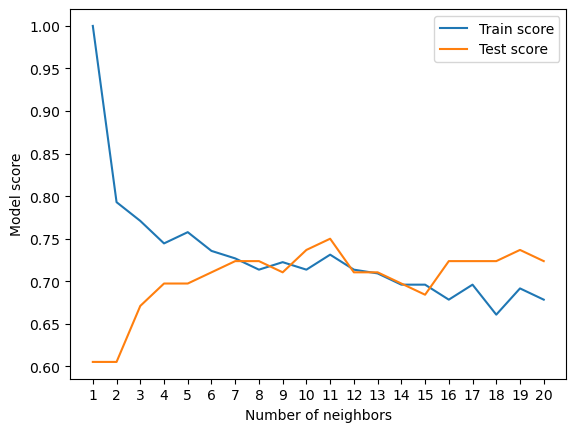

In [29]:
plt.plot(neighbors, train_score, label="Train score")
plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_score)*100:.2f}%")

**KNN model**: `n_neighbors (11)`.This is maximum accuracy for KNN model.

### Hyperparameter tuning with `RandomizedSearchCV`

* LogisticRegression()
* RandomForestClassifier()
* GaussianNB()

**`LogisticRegression()`**

In [30]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 11)]

# Number of features to consider at every split
max_features = ['sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(80, 210, num = 3)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(2, 110, num = 3)]

# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(2, 110, num = 3)]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "max_iter": np.arange(1000, 5000, 1000),
                "solver": ['liblinear'],
                "penalty": ['l1', 'l2']}

# hyperparameter grid for RandomForestClassifier
rf_grid ={'n_estimators': n_estimators,
          'max_features': max_features,
          'max_depth': max_depth,
          'min_samples_split': min_samples_split,
          'min_samples_leaf': min_samples_leaf,
          'bootstrap': bootstrap}

# hyperparameter grid for GaussianNB
nb_grid = {'var_smoothing': np.logspace(0, -9, 100)}

In [31]:
# setup random seed
np.random.seed(42)

# setup random hyperparameter search for logisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=StratifiedKFold(),
                                n_iter=40,
                                verbose=True)

# fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [32]:
rs_log_reg.best_params_

{'solver': 'liblinear',
 'penalty': 'l2',
 'max_iter': 3000,
 'C': 0.23357214690901212}

In [33]:
rs_log_reg.score(X_test, y_test)

0.8947368421052632

**`RandomForestClassifier()`**

In [34]:
# setup random seed
np.random.seed(42)

# setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=StratifiedKFold(),
                           n_iter=50,
                           verbose=True,
                           n_jobs=-1)

# fit random hyperparameter search model
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [80, 145, 210, None],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [2, 56, 110],
                                        'min_samples_split': [2, 56, 110],
                                        'n_estimators': [10, 209, 408, 607, 806,
                                                         1005, 1204, 1403, 1602,
                                                         1801, 2000]},
                   verbose=True)

In [35]:
# find best parameters
rs_rf.best_params_

{'n_estimators': 209,
 'min_samples_split': 56,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 210,
 'bootstrap': False}

In [36]:
# evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8421052631578947

In [37]:
model_scores

{'Logistic Regression        ': 0.8947368421052632,
 'KNN                        ': 0.6973684210526315,
 'Random Forest              ': 0.8157894736842105,
 'CatBoost                   ': 0.8157894736842105,
 'XgBoost                    ': 0.8157894736842105,
 'Naive Bayes                ': 0.881578947368421,
 'Support Vector Machines    ': 0.6973684210526315,
 'Stochastic Gradient Descent': 0.5526315789473685}

In [38]:
# how much increased as per base model
rs_rf_improve = (rs_rf.score(X_test, y_test) - model_scores.get('Random Forest              '))
rs_rf_improve

0.02631578947368418

**`GaussianNB()`**

In [39]:
# setup random seed
np.random.seed(42)

# setup random hyperparameter search for logisticRegression
rs_nb = RandomizedSearchCV(GaussianNB(),
                                param_distributions=nb_grid,
                                cv=StratifiedKFold(),
                                n_iter=40,
                                verbose=True)

# fit random hyperparameter search model
rs_nb.fit(X_train, y_train);

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [40]:
rs_nb.score(X_test, y_test)

0.8947368421052632

### Hyperparameter Tuning with GridSearchCV

* LogisticRegression
* RandomForestClassifier
* CatboostClassifier
* GaussianNB

***Experiments with GridSearchCV for above best models***

**`LogisticRegression`**

In [41]:
# hyperparameter grid for LogisticRegression
# log_reg_grid = {"penalty": ['l1', 'l2', 'elasticnet', 'none'],
#                 "C": np.logspace(-4, 4, 20),
#                 "solver": ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
#                 'max_iter': [5000]
#                 }

log_reg_grid = {"C": np.logspace(-4, 4, 50),
                "max_iter": np.arange(1000, 5000, 500),
                "solver": ['liblinear'],
                "penalty": ['l1', 'l2']}

# setup random hyperparameter search for logisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=StratifiedKFold(),
                          verbose=True,
                          n_jobs=-1)

# fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


In [42]:
# check the best parameters
gs_log_reg.best_params_

{'C': 0.18420699693267145,
 'max_iter': 1000,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [43]:
gs_log_reg.score(X_test, y_test)

0.8947368421052632

In [44]:
print(f'Accuracy: {gs_log_reg.score(X_test, y_test):.3f}')

Accuracy: 0.895


**`RandomForestClassifier`**

In [45]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 3)]

# Number of features to consider at every split
max_features = ['sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(80, 210, num = 3)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(56, 110, num = 3)]

# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(56, 110, num = 3)]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# hyperparameter grid for RandomForestClassifier
rf_grid ={'n_estimators': n_estimators,
          'max_features': max_features,
          'max_depth': max_depth,
          'min_samples_split': min_samples_split,
          'min_samples_leaf': min_samples_leaf,
          'bootstrap': bootstrap}

# setup GridSearchCV hyperparameter for RandomForestClassifier
gs_rf = GridSearchCV(RandomForestClassifier(),
                     param_grid=rf_grid,
                     cv=StratifiedKFold(),
                     verbose=True,
                     n_jobs=-1)

# fit grid hyperparameter
gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [80, 145, 210, None],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [56, 83, 110],
                         'min_samples_split': [56, 83, 110],
                         'n_estimators': [10, 1005, 2000]},
             verbose=True)

In [46]:
gs_rf.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=210, min_samples_leaf=56,
                       min_samples_split=110, n_estimators=1005)

In [47]:
gs_rf.best_params_

{'bootstrap': False,
 'max_depth': 210,
 'max_features': 'sqrt',
 'min_samples_leaf': 56,
 'min_samples_split': 110,
 'n_estimators': 1005}

In [48]:
gs_rf.score(X_test, y_test)

0.9078947368421053

In [49]:
print(f'Accuracy: {gs_rf.score(X_test, y_test):.3f}')

Accuracy: 0.908


In [50]:
# how much increased as per base model
gs_rf_improve = (gs_rf.score(X_test, y_test) - model_scores.get('Random Forest              '))
gs_rf_improve

0.0921052631578948

**`CatboostClassifier`**

In [51]:
depth = [int(x) for x in np.linspace(6, 11, num = 5)]

learning_rate = [float(x) for x in np.linspace(0.04, 0.09, num = 5)]

iterations = [int(x) for x in np.linspace(10, 50, num = 5)]

cb_grid = {'depth': depth,
           'learning_rate': learning_rate,
           'iterations': iterations}

# setup hyperparameter for CatBoost Classifier
gs_cb = GridSearchCV(CatBoostClassifier(),
                     param_grid=cb_grid,
                     cv=StratifiedKFold(),
                     verbose=True,
                     n_jobs=-1)

# fit grid hyperparameter
gs_cb.fit(X_train, y_train);

Fitting 5 folds for each of 125 candidates, totalling 625 fits
0:	learn: 0.6737615	total: 2.37ms	remaining: 68.7ms
1:	learn: 0.6531845	total: 4.6ms	remaining: 64.4ms
2:	learn: 0.6413713	total: 6.63ms	remaining: 59.6ms
3:	learn: 0.6222068	total: 7.88ms	remaining: 51.2ms
4:	learn: 0.5962512	total: 8.31ms	remaining: 41.6ms
5:	learn: 0.5847062	total: 10.2ms	remaining: 41ms
6:	learn: 0.5686715	total: 10.8ms	remaining: 35.5ms
7:	learn: 0.5579293	total: 12.8ms	remaining: 35.1ms
8:	learn: 0.5496587	total: 14.7ms	remaining: 34.4ms
9:	learn: 0.5363895	total: 16ms	remaining: 32ms
10:	learn: 0.5236062	total: 16.8ms	remaining: 29.1ms
11:	learn: 0.5157541	total: 18.9ms	remaining: 28.3ms
12:	learn: 0.5048443	total: 20.8ms	remaining: 27.2ms
13:	learn: 0.4913515	total: 22ms	remaining: 25.2ms
14:	learn: 0.4839496	total: 23.9ms	remaining: 23.9ms
15:	learn: 0.4766455	total: 25.9ms	remaining: 22.6ms
16:	learn: 0.4697709	total: 27.7ms	remaining: 21.2ms
17:	learn: 0.4598366	total: 28.3ms	remaining: 18.9ms
18

In [52]:
print(" Results from Grid Search " )
print("\n The best parameters across ALL searched params:\n",gs_cb.best_params_)
print(f'\n Accuracy: {gs_cb.score(X_test, y_test):.3f}')

 Results from Grid Search 

 The best parameters across ALL searched params:
 {'depth': 9, 'iterations': 30, 'learning_rate': 0.09}

 Accuracy: 0.829


**`GaussianNB`**

In [53]:
# hyperparameter grid for GaussianNB
nb_grid = {'var_smoothing': np.logspace(-4, -9, 100)}

# setup hyperparameter for GaussianNB
gs_nb = GridSearchCV(GaussianNB(),
                     param_grid=nb_grid,
                     cv=StratifiedKFold(),
                     verbose=True,
                     n_jobs=-1)

# fit grid hyperparameter
gs_nb.fit(X_train, y_train);

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [54]:
print(" Results from Grid Search " )
print("\n The best parameters across ALL searched params:\n",gs_nb.best_params_)
print(f'\n Accuracy: {gs_nb.score(X_test, y_test):.3f}')

 Results from Grid Search 

 The best parameters across ALL searched params:
 {'var_smoothing': 6.280291441834246e-05}

 Accuracy: 0.895


evaluate our classification model for TEAM.

### Evaluating the `BEST classification model`, beyond accuracy

* **ROC curve and AUC score**: `plot_roc_curve()`
* **Confusion matrix**: `confusion_matrix()`
* **Classification report**: `classification_report()`
* **Precision**: `precision_score()`
* **Recall**: `recall_score()`
* **F1-score**: `f1_score()`

In [55]:
# make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [56]:
pd.DataFrame({'True Label': y_test, 'Predict Label': y_preds})

,True Label,Predict Label
179,0,0
228,0,1
111,1,1
246,0,0
60,1,1
...,...,...
22,1,1
258,0,0
56,1,1
242,0,0


### `1. ROC curve and AUC score`

**ROC curve**: performing by comparing the `true positive` rate to the `false positive` rate.
> To get an appropriate example in a real-world problem, consider a diagnostic test that seeks to determine whether a person has a certain disease. A false positive in this case occurs when the person tests positive, but does not actually have the disease. A false negative, on the other hand, occurs when the person tests negative, suggesting they are healthy, when they actually do have the disease.

**AUC score**: area under the curve.

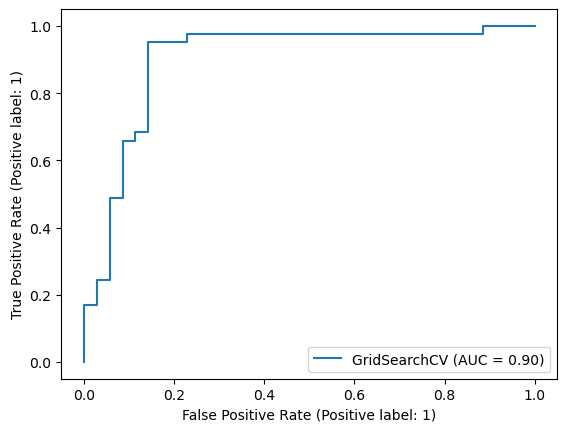

In [57]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_rf, X_test, y_test);

warnings.filterwarnings("default")

**`AUC`**: Calcuated Area Under Curve, maximum value is `1`, model is good as per how much you close to maximum value. 

###  `2. Confusion matrix`

In [58]:
print(confusion_matrix(y_test, y_preds))

[[30  5]
 [ 3 38]]


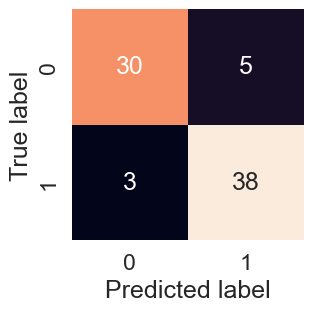

In [59]:
# plot matrix by custom
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_conf_mat(y_test, y_preds)

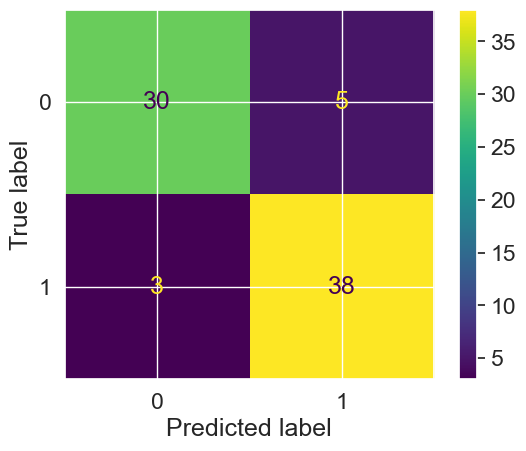

In [60]:
# plot matrix by sklearn library
from sklearn.metrics import ConfusionMatrixDisplay

# matrix for predictions
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

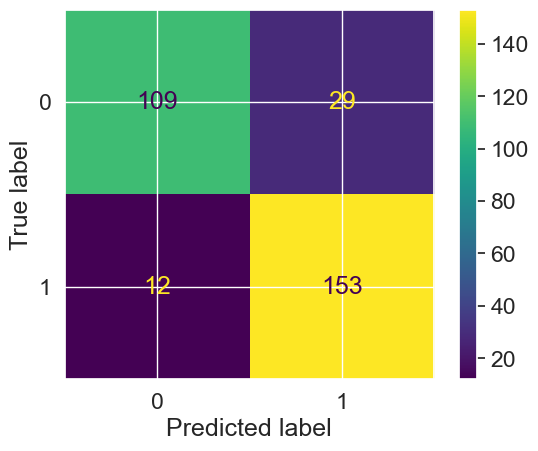

In [61]:
# confusion matrix for estimator
ConfusionMatrixDisplay.from_estimator(estimator=gs_rf, X=X, y=y);

### `3. Classification report`

#### Due to Normal Train and Test Split

In [62]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88        35
           1       0.88      0.93      0.90        41

    accuracy                           0.89        76
   macro avg       0.90      0.89      0.89        76
weighted avg       0.90      0.89      0.89        76



**Key Descriptions**
* **`Precision`**: Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **`Recall`**: Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **`F1 score`**: A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **`Support`**: The number of samples each metric was calculated on.
* **`Accuracy`**: The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* **`Macro avg`**: Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
* **`Weighted avg`**: Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

### Due to Cross-validation, calculate evaluation metrics
**`cross_val_score()`**: works by taking an estimator (machine learning model) along with data and labels. It then evaluates the machine learning model on the data and labels using `cross-validation` and a defined `scoring` parameter.

* **cross validated metrics**

In [63]:
# check best hyperparameters
gs_log_reg.best_params_

{'C': 0.18420699693267145,
 'max_iter': 1000,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [77]:
# final score
gs_log_reg.score(X_test, y_test)

0.8947368421052632

In [64]:
# Instantiate best model with best hyperparameters
clf = LogisticRegression(C=0.20433597178569418,
                         max_iter=1000,
                         penalty='l2',
                         solver='liblinear')

In [65]:
# cross-validated accuracy score
cv_acc = cross_val_score(clf, X, y, cv=StratifiedKFold(), scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [66]:
# calculate average of cross-validation
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [67]:
# cross-validated precision score
cv_precision = cross_val_score(clf, X, y, cv=StratifiedKFold(), scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [68]:
# cross-validated recall score
cv_recall = cross_val_score(clf, X, y, cv=StratifiedKFold(), scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [69]:
# cross-validated F1 score
cv_f1 = cross_val_score(clf, X, y, cv=StratifiedKFold(), scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

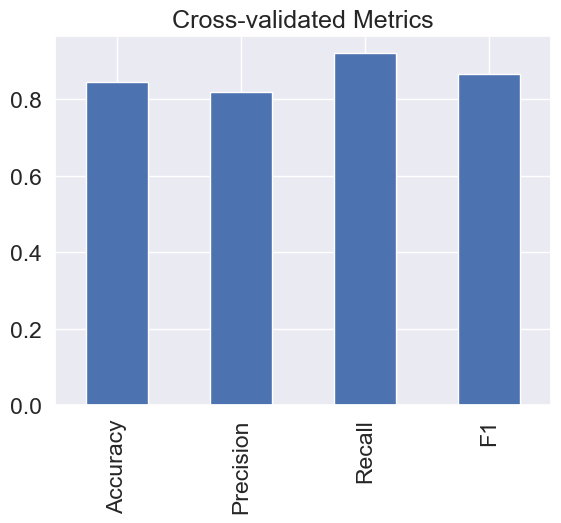

In [70]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1}, index=[0])

cv_metrics.T.plot.bar(title="Cross-validated Metrics", legend=False);

### Feature Importance

Feature importance is another way of asking, `which features contributing most to the outcomes of the model?`

> for our problem, trying to predict heart disease using a patient's medical characterisitcs, `which charateristics contribute most to a model predicting whether someone has heart disease or not?`

***Finding feature importance is different for each machine learning model***

* `LogisticRegression`: coefficient

In [71]:
# fit an instance of LogisticRegression
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, max_iter=1000, solver='liblinear')

In [72]:
# check coefficient
clf.coef_

array([[ 0.00503922, -0.76947823,  0.68812983, -0.00991718, -0.00127897,
         0.00226276,  0.40721864,  0.02147257, -0.60142004, -0.54531813,
         0.45519223, -0.6569426 , -0.70184842]])

In [73]:
# match features to column
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.005039219028197717,
 'sex': -0.7694782261251526,
 'cp': 0.6881298272584871,
 'trestbps': -0.009917184184719494,
 'chol': -0.0012789704596882492,
 'fbs': 0.002262758498285967,
 'restecg': 0.40721864391970897,
 'thalach': 0.02147257412019282,
 'exang': -0.6014200434372448,
 'oldpeak': -0.5453181276533761,
 'slope': 0.4551922319697744,
 'ca': -0.6569426022962225,
 'thal': -0.7018484174338481}

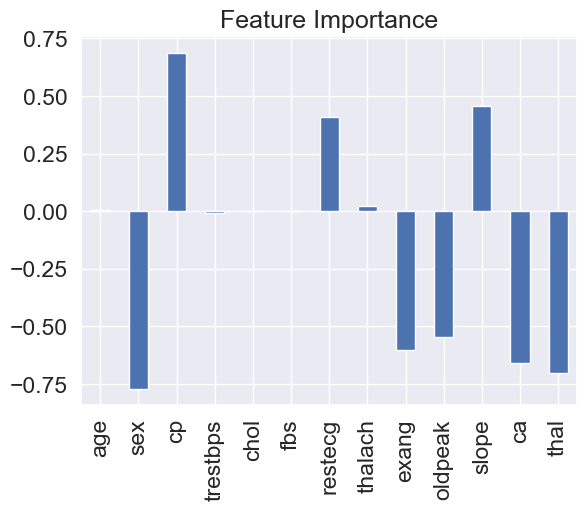

In [74]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

***The larger the value (bigger bar), the more the `feature contributes` to the models decision.***

> For example, the sex attribute has a negative value of -0.904, which means as the value for sex increases, the target value decreases.

In [75]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


* when sex is 0 (female), there are almost 3 times as many `(72 vs. 24)` people with heart disease `(target = 1)` than without.

* when sex increases to 1 (male), the ratio goes down to almost 1 to 1 `(114 vs. 93)` of people who have heart disease and who don't.

>  it seems if the patient is female, they're more likely to have heart disease.

In [76]:
# Contrast slope "positive coefficient" with target
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


***This positive correlation means our model is picking up the pattern that as slope increases, so does the target value.***

**Keys**
* **`Finding out more`**: If some of the correlations and feature importances are confusing, a subject matter expert may be able to shed some light on the situation and help you figure out more.
* **`Redirecting efforts`**: If some features offer far more value than others, this may change how you collect data for different problems. See point 3.
* **`Less but better`**: Similar to above, if some features are offering far more value than others, you could reduce the number of features your model tries to find patterns in as well as improve the ones which offer the most. This could potentially lead to saving on computation, by having a model find patterns across less features, whilst still achieving the same performance levels.

### Saving and Loading Model

**`joblib`**

In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [89]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    in classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [82]:
from joblib import dump, load

# save model to file
dump(gs_log_reg, filename="models/heart_disease_LogisticRegression_classification_model_1.joblib")

['models/heart_disease_LogisticRegression_classification_model_1.joblib']

In [83]:
# import a saved joblib model
loaded_job_model = load(filename="models/heart_disease_LogisticRegression_classification_model_1.joblib")

In [85]:
# make and evaluate joblib predictions
joblib_y_preds = loaded_job_model.predict(X_test)
pd.DataFrame({'True Label': y_test, 'Predict Label': joblib_y_preds})

,True Label,Predict Label
179,0,0
228,0,1
111,1,1
246,0,0
60,1,1
...,...,...
22,1,1
258,0,0
56,1,1
242,0,0


In [88]:
evaluate_preds(y_test, joblib_y_preds)

Acc: 89.47%
Precision: 0.88
Recall: 0.93
F1 score: 0.90


{'accuracy': 0.89, 'precision': 0.88, 'recall': 0.93, 'f1': 0.9}